# Light Gradient Boosted Machine Regressor

In [ ]:
# Устанавливаем библиотеку
!pip install optuna
# или
#!conda install -c conda-forge optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.1 MB/s eta 0:00:00


In [ ]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.0


In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import joblib

In [ ]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train MAE: {:.2f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train R^2: {:.2f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('\n')
    print('Test MAE: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.2f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test R^2: {:.2f}'.format(metrics.r2_score(y_test, y_test_predict)))

def print_test(y_test, y_test_pred):
  y_t = []
  y_t_p = []
  cnt = 0
  for i in range(len(y_test)):
    if cnt < len(y_test):
      y_t.append(y_test[cnt])
      y_t_p.append(y_test_pred[cnt])
      cnt += 1000
    else:
      break
  return(y_t, y_t_p)

In [ ]:
X_train_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_train_scaled.zip')
X_test_scaled = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/X_test_scaled.zip')
y_train = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_train = y_train['target'].tolist()
y_test = y_test['target'].tolist()
y_train_log = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_train_log.csv')
y_train_log = y_train_log['target'].tolist()

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(len(y_train))
print(len(y_test))

(280575, 25)
(70144, 25)
280575
70144


In [ ]:
y_train_log

[12.911395402020252,
 12.675763725937609,
 13.030028766201532,
 13.2392482320391,
 13.9108207377686,
 12.560244459250788,
 10.714417768752456,
 12.936031389571378,
 12.6112043647371,
 14.28551418721001,
 12.594730635321955,
 12.04649057570571,
 12.48748510496836,
 12.301382825334498,
 12.62115799701533,
 13.123312926439915,
 14.727793268440893,
 13.159659162148026,
 12.180754837545884,
 12.759957758756611,
 12.959844447906551,
 11.917723684090689,
 12.751299696013495,
 11.884489021402713,
 13.038981768465275,
 13.652991628466498,
 10.532096211958502,
 13.017002861746503,
 12.224967998632463,
 14.3454844773511,
 12.309783801742215,
 13.623017445848824,
 14.5716193920593,
 11.771436160121729,
 12.53860857361558,
 12.097930486910473,
 12.89088014744002,
 12.992254692057308,
 12.788288265382835,
 16.204273347199372,
 12.559893520486,
 12.254862809699606,
 13.279367126213993,
 13.592367006650065,
 10.594131602877956,
 12.542541310716436,
 11.976659481202368,
 12.215086894831323,
 13.0708595

In [ ]:
random_state = 42

Оптимизация гиперпараметров Light Gradient Boosted Machine Regressor

In [ ]:
# Гип. параметры по умолчанию
lightgbm = LGBMRegressor()
hiperparams = lightgbm.get_params()

print("Гиперпараметры по умолчанию:")
for key, value in hiperparams.items():
    print(f"\t{key}: {value}")

Гиперпараметры по умолчанию:
	boosting_type: gbdt
	class_weight: None
	colsample_bytree: 1.0
	importance_type: split
	learning_rate: 0.1
	max_depth: -1
	min_child_samples: 20
	min_child_weight: 0.001
	min_split_gain: 0.0
	n_estimators: 100
	n_jobs: -1
	num_leaves: 31
	objective: None
	random_state: None
	reg_alpha: 0.0
	reg_lambda: 0.0
	silent: True
	subsample: 1.0
	subsample_for_bin: 200000
	subsample_freq: 0


In [ ]:
def LGBMR(trial):
    
    param = {
        # 'device':'gpu',
        # 'metric':'rmse',
        'random_state':42,
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
        'n_estimators': trial.suggest_categorical("n_estimators", [150, 200, 300, 3000]),
        'max_depth': trial.suggest_categorical('max_depth', [4, 5, 7, 9, 11, 13, 15, 17, 20]), # максимальная глубина
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'num_leaves': trial.suggest_int('num_leaves', 15, 120), # количество листьев

        'max_bin': trial.suggest_int('max_bin', 20, 500),
        'bagging_seed': trial.suggest_int('bagging_seed', 0, 10),
        'feature_fraction_seed': trial.suggest_int('feature_fraction_seed', 0, 2),
        # 'verbose': trial.suggest_int('verbose', -1, 1)
    }

    lightgbm = LGBMRegressor(**param)

    lightgbm.fit(X_train_scaled, y_train_log, 
              eval_set=[(X_test_scaled, y_test)], 
              early_stopping_rounds=300, verbose=False)
    
    # Предскажем результат.
    y_test_pred = np.exp(lightgbm.predict(X_test_scaled))
    
    score = metrics.r2_score(y_test, y_test_pred)

    return score

https://www.kaggle.com/code/lequanghai/tpsfeb21-lightgbm-with-optuna

In [ ]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(direction='maximize')
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(LGBMR, n_trials=15)
print('===================================================')
print('No of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-03-14 07:00:00,552] A new study created in memory with name: no-name-d2fbbf3e-22be-4ebc-8772-216a8ffb18f6
[I 2023-03-14 07:00:14,120] Trial 0 finished with value: 0.6846554065058055 and parameters: {'reg_lambda': 5.143046734845315, 'reg_alpha': 6.658532516301619, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.016, 'n_estimators': 200, 'max_depth': 7, 'min_child_samples': 232, 'num_leaves': 81, 'max_bin': 378, 'bagging_seed': 10, 'feature_fraction_seed': 2}. Best is trial 0 with value: 0.6846554065058055.
[I 2023-03-14 07:00:31,418] Trial 1 finished with value: 0.6352145516276124 and parameters: {'reg_lambda': 0.05829795081265671, 'reg_alpha': 1.799272043927917, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.014, 'n_estimators': 200, 'max_depth': 9, 'min_child_samples': 80, 'num_leaves': 96, 'max_bin': 446, 'bagging_seed': 4, 'feature_fraction_seed': 1}. Best is trial 0 with value: 0.6846554065058055.
[I 2023-03-14 07:00:35,105] Trial 2 finished wit

No of finished trials: 15
Best trial: {'reg_lambda': 1.9780200387385667, 'reg_alpha': 7.545608161655421, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.02, 'n_estimators': 3000, 'max_depth': 13, 'min_child_samples': 300, 'num_leaves': 26, 'max_bin': 495, 'bagging_seed': 1, 'feature_fraction_seed': 1}
CPU times: user 10min 37s, sys: 3.72 s, total: 10min 41s
Wall time: 6min 2s


In [ ]:
# рассчитаем точность для обучающей и тестовой выборок.
lightgbm = LGBMRegressor(**study.best_params, random_state=random_state)
lightgbm.fit(X_train_scaled, y_train_log)

# Производим сериализацию и сохраняем результат в файл формата .joblib
joblib.dump(lightgbm, '/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/fit_models/lightgbm.joblib')

y_train_pred_lgbm = np.exp(lightgbm.predict(X_train_scaled))
y_test_pred_lgbm = np.exp(lightgbm.predict(X_test_scaled))

# Сохраним предсказание в файл.
np.savetxt("/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_lgbm.csv", y_test_pred_lgbm, delimiter=",")

print_metrics(y_train, y_train_pred_lgbm, y_test, y_test_pred_lgbm)

Train MAE: 86647.40
Train MAPE: 20.58%
Train R^2: 0.81


Test MAE: 89635.88
Test MAPE: 21.93%
Test R^2: 0.81


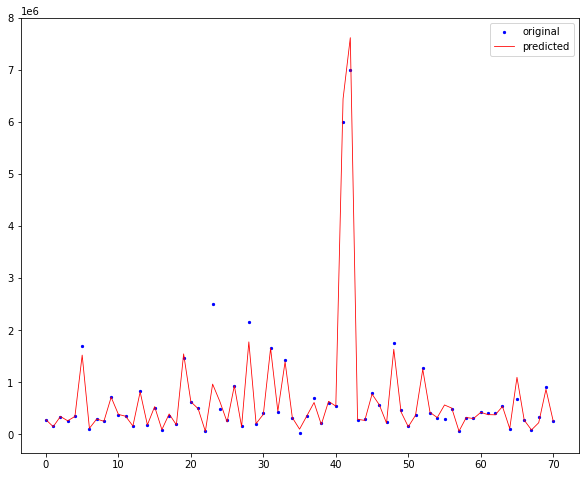

In [ ]:
# Возмём каждую 1000-ю строку из выборок, чтобы визуально убедиться в точности предсказаний.
y_t, y_t_p = print_test(y_test, y_test_pred_lgbm)
# Визуализируем предсказания на тестовой выборке.
x_ax = range(len(y_t))
plt.figure(figsize=(10,8))
# Точки тестовой выборки.
plt.scatter(x_ax, y_t, s=5, color="blue", label="original")
# График предсказаний.
plt.plot(x_ax, y_t_p, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

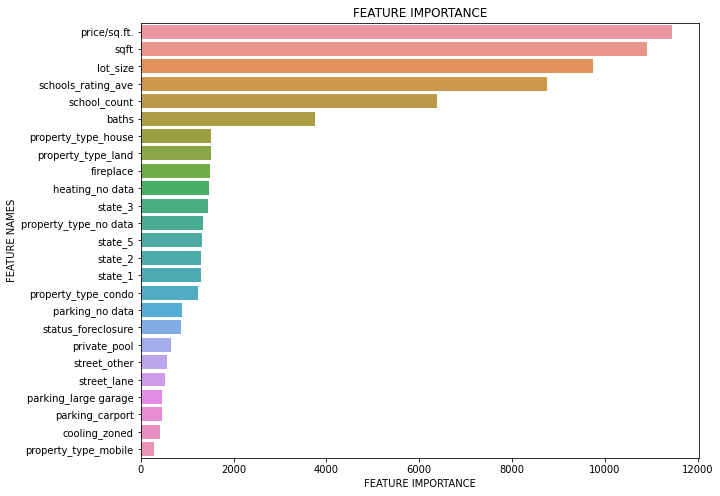

In [ ]:
# Покажем важность признаков.
feature_importance = np.array(lightgbm.feature_importances_)
feature_names = np.array(X_train_scaled.columns)

# Создадим DataFrame, используя словарь.
data={'feature_names': feature_names, 'feature_importance': feature_importance}
fi_df = pd.DataFrame(data)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

# Определим размер столбчатой диаграммы.
plt.figure(figsize=(10,8))
# Построим столбчатую диаграмму.
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
# Добавим метки диаграммы.
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES');

In [ ]:
mae_lgbm = metrics.mean_absolute_error(y_test, y_test_pred_lgbm)
mape_lgbm = metrics.mean_absolute_percentage_error(y_test, y_test_pred_lgbm)*100
r2_lgbm = metrics.r2_score(y_test, y_test_pred_lgbm)

print(round(mae_lgbm, 2))
print(round(mape_lgbm, 2))
print(round(r2_lgbm, 2))

89635.88
21.93
0.81


In [ ]:
optuna.visualization.plot_optimization_history(study, target_name="r2_score")

In [ ]:
optuna.visualization.plot_param_importances(study, target_name="r2_score")